<a href="https://colab.research.google.com/github/shuler7/DataMiningPublic/blob/main/StrokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and exploring data practice time!!! 😀 (ideas, have people work in pairs)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://github.com/mbrudd/csci290/raw/main/data/stroke.csv")

In [4]:
df.columns #Gives

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df["stroke"].unique()

array([1, 0])

In [9]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df[["ever_married","stroke"]].value_counts(normalize=True)

,,proportion
ever_married,stroke,
Yes,0,0.613112
No,0,0.338160
Yes,1,0.043053
No,1,0.005675


In [11]:
df["stroke"].mean()

0.0487279843444227

<Axes: xlabel='age', ylabel='stroke'>

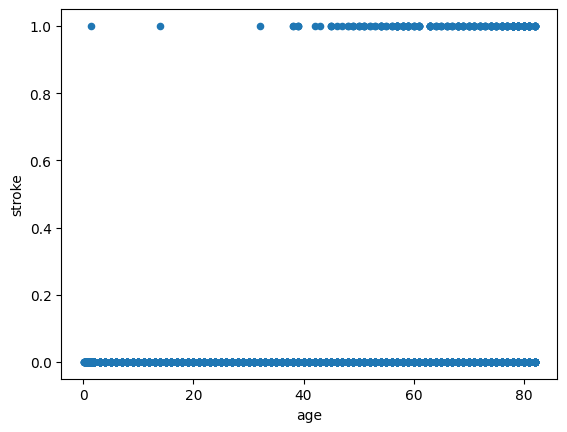

In [12]:
df.plot(x="age", y="stroke", kind= "scatter")

How to turn a quantitative variable into a categroical variable

In [13]:
df["age"].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [14]:
df["age_cat"] = pd.cut( df["age"], bins = [0,25,45,61,100], labels = ["Young", "Adult", "Middle_aged", "Old"])

In [15]:
df["age_cat"].value_counts()

,count
age_cat,
Adult,1325
Young,1293
Middle_aged,1264
Old,1228


In [16]:
df.groupby("age_cat", observed=True)["stroke"].mean()

,stroke
age_cat,
Young,0.001547
Adult,0.008302
Middle_aged,0.051424
Old,0.139251


In [17]:
df.groupby(["work_type","ever_married","Residence_type"], observed=True)["stroke"].mean()

work_type      ever_married  Residence_type
Govt_job       No            Rural             0.018182
                             Urban             0.080645
               Yes           Rural             0.050584
                             Urban             0.049470
Never_worked   No            Rural             0.000000
                             Urban             0.000000
Private        No            Rural             0.011990
                             Urban             0.022277
               Yes           Rural             0.060287
                             Urban             0.067989
Self-employed  No            Rural             0.018868
                             Urban             0.105263
               Yes           Rural             0.088235
                             Urban             0.075881
children       No            Rural             0.002941
                             Urban             0.002882
Name: stroke, dtype: float64

Build a Simple Classifier

In [18]:
df["prediction"] = df["age"] >25

In [19]:
df["prediction"].value_counts()

,count
prediction,
True,3817
False,1293


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
cm = confusion_matrix( df["stroke"], df["prediction"])
cm

array([[1291, 3570],
       [   2,  247]])

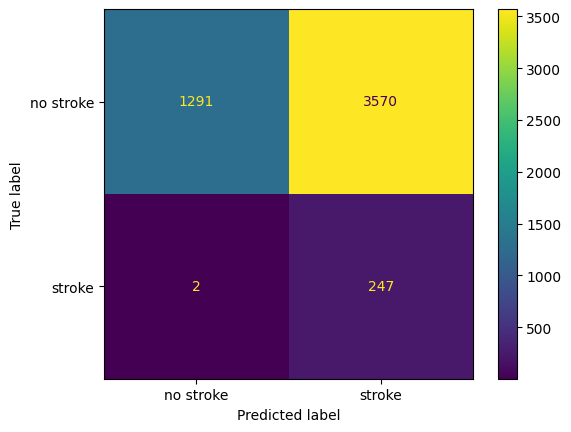

In [22]:
ConfusionMatrixDisplay( cm, display_labels = ["no stroke", "stroke"]).plot()

In [23]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(1291, 3570, 2, 247)

In [24]:
import sklearn.metrics as metrics

In [25]:
metrics.recall_score( df["stroke"], df["prediction"])

0.9919678714859438

In [26]:
tp / (tp+fn)

0.9919678714859438

In [27]:
metrics.recall_score( df["stroke"], df["prediction"])

0.9919678714859438

In [28]:
tp/ (tp+fp)

0.06471050563269583

In [29]:
metrics.precision_score( df["stroke"], df["prediction"])

0.06471050563269583

In [30]:
def precision_vs_recall( threshold ):
  df["prediction"] = df["age"] > threshold
  return metrics.precision_score( df["stroke"], df["prediction"]), metrics.recall_score( df["stroke"], df["prediction"])

In [31]:
precision_vs_recall(80)

(0.19827586206896552, 0.09236947791164658)

In [32]:
precisions = []
recalls = []
thresholds = range(0,83)
for threshold in thresholds:
  precision, recall = precision_vs_recall( threshold )
  precisions.append( precision )
  recalls.append( recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
pr = pd.DataFrame( {
    'threshold': thresholds,
    'recall': recalls,
    'precision': precision
})